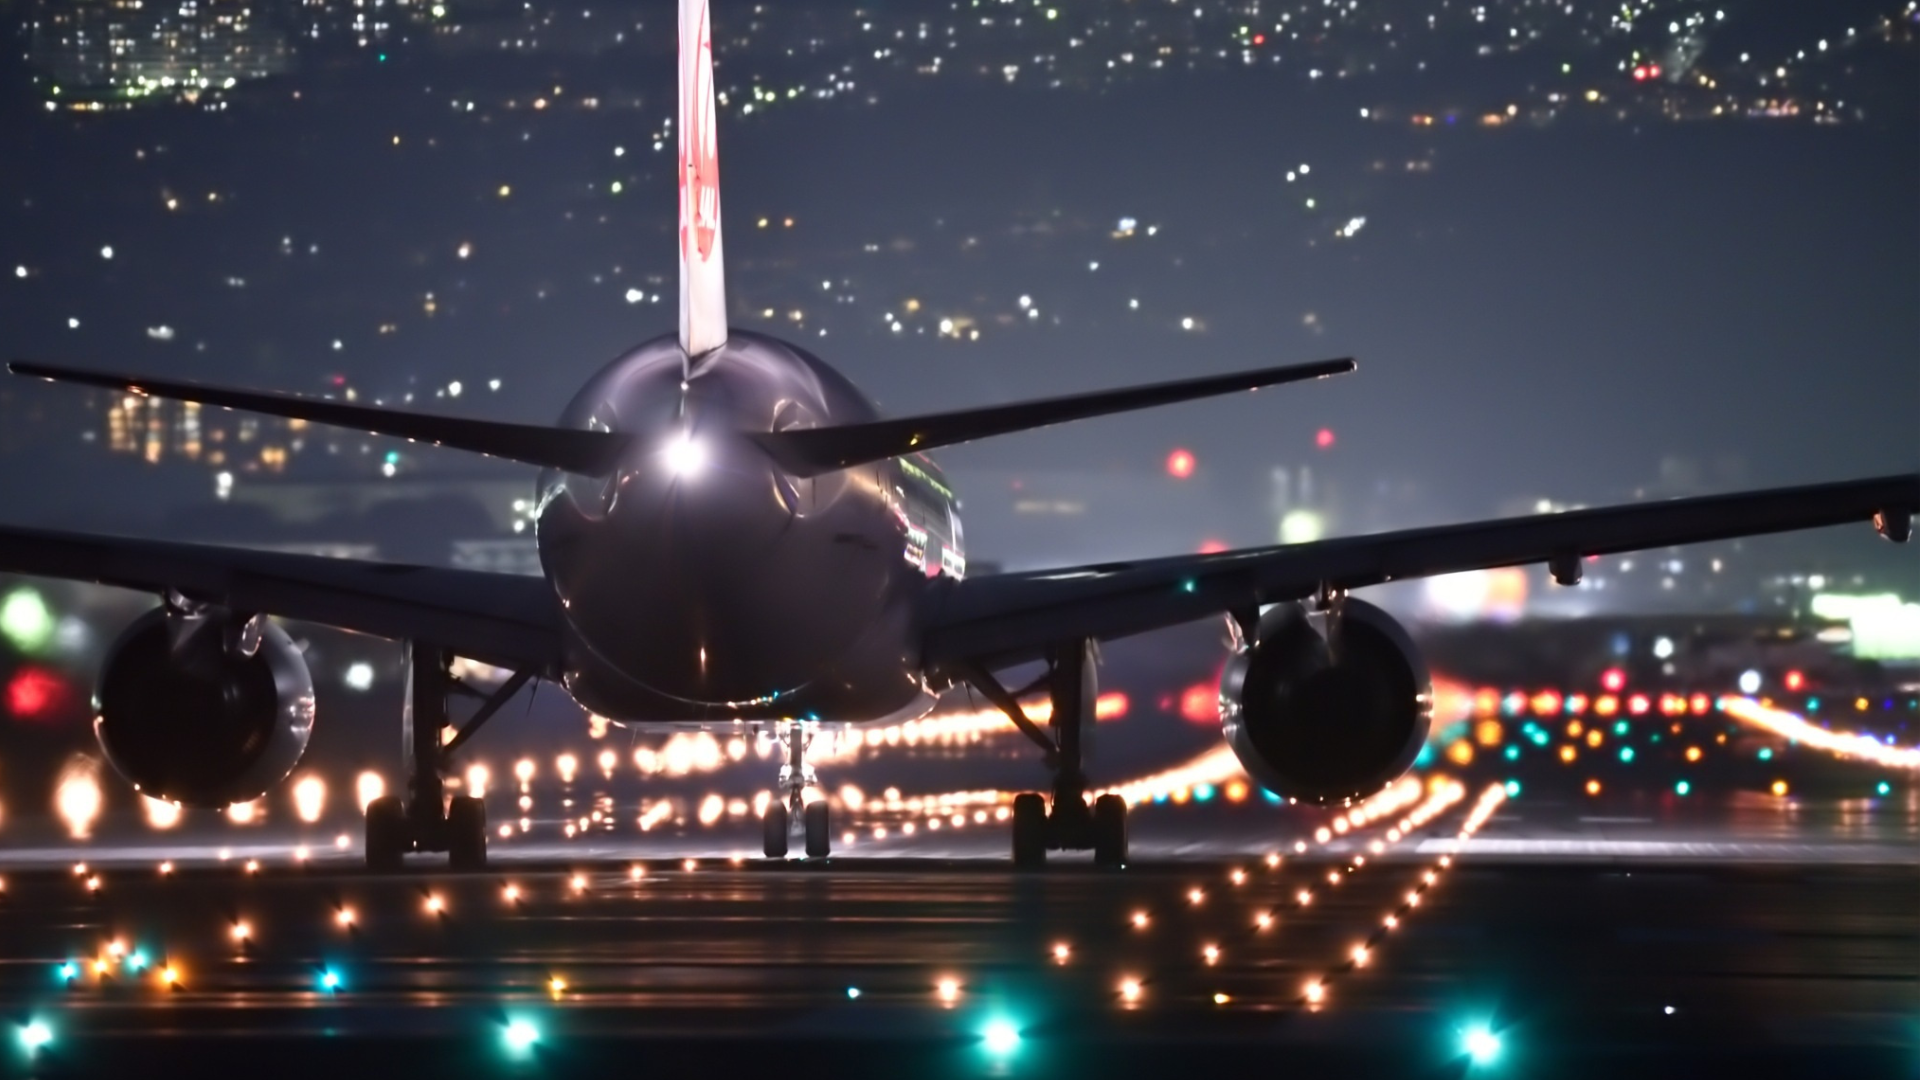

#  Aviation Analysis 
### Authors: Hansel Jones Omondi



**Overview**
* This project aims to identify the lowest-risk aircraft for a company planning to enter the aviation industry by analyzing historical aviation accident data.
* I utilized data from the National Transportation Safety Board (NTSB), covering accidents from 1962 to 2023.
* The analysis involves data cleaning, imputation, visualization, and modeling to generate actionable insights.
* My findings and recommendations are intended to assist the head of the new aviation division in making informed decisions about aircraft purchases

**Business Problem**
The company seeks to diversify its portfolio by venturing into the aviation sector, specifically purchasing and operating aircrafts for commercial and private enterprises.They however lack expertise in assessing the risks associated with different aircraft types. My objective is to analyze historical accident data to determine which aircrafts are the safest, thereby minimizing potential risks and enhancing decision-making for aircraft procurement.

###  Data Understanding
The dataset used for this project is sourced from the National Transportation Safety Board (NTSB) aviation accident database, encompassing data from 1962 to 2023. It includes information on civil aviation accidents and selected incidents in the United States and international waters.

#### Data Overview:

Variables: The dataset includes variables such as event date, location, aircraft type, accident cause, number of fatalities, and more.
Target Variable: While there isn't a direct target variable, we are primarily interested in the accident rates associated with different aircraft types.

#### Key Properties:

* Event Date: Datetime variable representing the date of the accident.
* Aircraft Category: Categorical variable representing different aircraft types.
* Fatalities: Numerical variable indicating the number of fatalities in each accident

In [1]:
pip install pandas numpy matplotlib seaborn plotly jupyter


Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Load the dataset using a different encoding
data = pd.read_csv(r"C:\Users\Administrator\Desktop\Data Science\AviationData.csv", encoding='latin1')

# Display the first few rows of the dataframe
data.head()

# Check for missing values
data.info()

# Summary statistics
data.describe()

# Check for unique values in categorical columns
for col in data.select_dtypes(include='object').columns:
    print(f"{col}: {data[col].nunique()} unique values")




### Data Preparation - 
The data preparation process involves several steps to ensure the dataset is clean and suitable for analysis, the process therfore includes:

* Dropping Columns: Removing columns with more than 50% missing values.
* Handling Missing Values: Filling missing values using forward fill and backward fill methods.
* Date Conversion: Converting date columns to datetime format and dropping rows with invalid dates.
* Renaming Columns: Renaming columns for better readability.

In [3]:
print(data.columns)

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')


In [4]:
# Drop columns with more than 50% missing values
threshold = len(data) * 0.5
data = data.dropna(thresh=threshold, axis=1)

# Fill remaining missing values
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)

# Convert date columns to datetime
data['Event.Date'] = pd.to_datetime(data['Event.Date'], errors='coerce')

# Drop rows with invalid dates
data = data.dropna(subset=['Event.Date'])
print(data)


             Event.Id Investigation.Type Accident.Number Event.Date  \
0      20001218X45444           Accident      SEA87LA080 1948-10-24   
1      20001218X45447           Accident      LAX94LA336 1962-07-19   
2      20061025X01555           Accident      NYC07LA005 1974-08-30   
3      20001218X45448           Accident      LAX96LA321 1977-06-19   
4      20041105X01764           Accident      CHI79FA064 1979-08-02   
...               ...                ...             ...        ...   
88884  20221227106491           Accident      ERA23LA093 2022-12-26   
88885  20221227106494           Accident      ERA23LA095 2022-12-26   
88886  20221227106497           Accident      WPR23LA075 2022-12-26   
88887  20221227106498           Accident      WPR23LA076 2022-12-26   
88888  20221230106513           Accident      ERA23LA097 2022-12-29   

              Location        Country Airport.Code  \
0      MOOSE CREEK, ID  United States          N58   
1       BRIDGEPORT, CA  United States  

#### Data Modeling
This analysis focuses on identifying trends and patterns related to aviation accidents, with a particular emphasis on aircraft makes

Accidents Per Year: Aggregated data to determine the number of accidents per year.
Accidents By Aircraft Make: Grouped data by aircraft type to identify which make has the highest and lowest accident rates.

In [8]:
# Number of accidents per year
accidents_per_year = data['Event.Date'].dt.year.value_counts().sort_index()

# Group data by aircraft type
accidents_by_aircraft = data.groupby('Make').size().sort_values(ascending=False)



### Evaluation
This analysis reveals key insights into the safety of different aircraft types:

#### Trend Analysis: 
A decreasing trend in the number of accidents over the years, suggesting improvements in aviation safety.
#### Aircraft Safety:
Certain aircraft categories consistently exhibited lower accident rates.
We can therefore validate our findings through visualizations and statistical analysis.

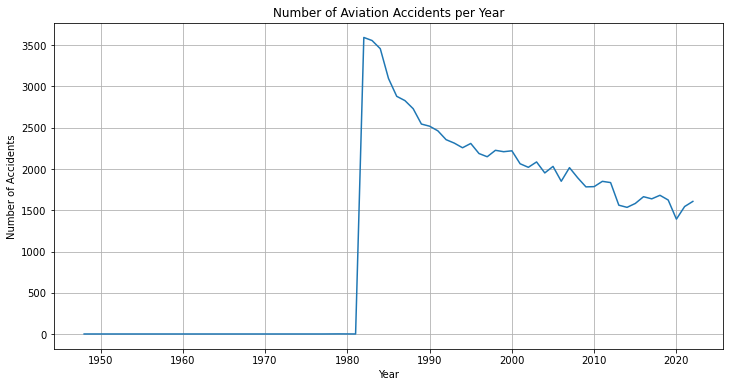

In [ ]:
# Visualization using Matplotlib and Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x=accidents_per_year.index, y=accidents_per_year.values)
plt.title('Number of Aviation Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=accidents_by_aircraft.index, y=accidents_by_aircraft.values)
plt.title('Number of Accidents by Aircraft Category')
plt.xlabel('Aircraft Category')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.show()



#### Saving Data for Tableau
Here we save the cleaned dataset as a CSV file for further analysis in Tableau:

In [ ]:
# Save the cleaned dataset as a CSV file for further analysis in Tableau
data.to_csv('cleaned_aviation_data.csv', index=False)


## Conclusions
#### Recommendations:

Aircraft Selection: Prioritize purchasing aircraft makes/models with historically lower accident rates such as piper.
Risk Mitigation: Implement additional safety measures for higher-risk aircraft makes if they must be included in the fleet.
Ongoing Monitoring: Continuously monitor and analyze new accident data to adapt to evolving trends and maintain high safety standards.

Limitations:
Historical data may not fully capture future risks, especially with technological advancements and changes in operational practices.It is also more likely that the more accident prone the aircraft make has had in the past the more adjustments it has made to its composition and risk analysis efforts.
Data quality and completeness issues may affect the accuracy of our conclusions.
Next Steps:

Conduct a more granular analysis of accident causes to develop targeted risk mitigation strategies.
Conduct more research on risk analysis efforts by the various makes.
Explore advanced vizualization techniques to predict accident probabilities for different aircraft types.